In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [11]:
df = pd.read_csv('train.csv')

In [12]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [14]:
df.sample(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
25,26,2492,135,6,0,0,860,229,237,142,...,0,0,0,0,0,0,0,0,0,5
1817,1818,2675,42,13,60,14,1110,222,211,122,...,0,0,0,0,0,0,0,0,0,2
13107,13108,2439,108,19,319,167,1273,249,215,87,...,0,0,0,0,0,0,0,0,0,3
5593,5594,2473,305,15,190,38,514,178,231,193,...,0,0,0,0,0,0,0,0,0,3
8190,8191,2831,102,18,242,106,1965,247,215,90,...,0,0,0,0,0,0,0,0,0,5


In [15]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [20]:
 print("1. DATASET BASIC INFORMATION")
df.shape
df.columns.tolist()
df.dtypes.value_counts()

1. DATASET BASIC INFORMATION


int64    56
Name: count, dtype: int64

In [34]:
print("MISSING VALUES ANALYSIS")
missing_values = df.isnull().sum()
print(missing_values)

MISSING VALUES ANALYSIS
Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10     

In [37]:
missing_percent = (missing_values / len(df)) * 100
print(missing_percent)

Id                                    0.0
Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area1                      0.0
Wilderness_Area2                      0.0
Wilderness_Area3                      0.0
Wilderness_Area4                      0.0
Soil_Type1                            0.0
Soil_Type2                            0.0
Soil_Type3                            0.0
Soil_Type4                            0.0
Soil_Type5                            0.0
Soil_Type6                            0.0
Soil_Type7                            0.0
Soil_Type8                            0.0
Soil_Type9                        

In [39]:
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent})
print(missing_info)

                                    Missing Count  Missing Percentage
Id                                              0                 0.0
Elevation                                       0                 0.0
Aspect                                          0                 0.0
Slope                                           0                 0.0
Horizontal_Distance_To_Hydrology                0                 0.0
Vertical_Distance_To_Hydrology                  0                 0.0
Horizontal_Distance_To_Roadways                 0                 0.0
Hillshade_9am                                   0                 0.0
Hillshade_Noon                                  0                 0.0
Hillshade_3pm                                   0                 0.0
Horizontal_Distance_To_Fire_Points              0                 0.0
Wilderness_Area1                                0                 0.0
Wilderness_Area2                                0                 0.0
Wilderness_Area3    

In [44]:
 print(missing_info[missing_info['Missing Count'] > 0])

Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [45]:
df['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [46]:
df['Cover_Type'].value_counts().sort_index()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64

In [49]:
print("\n4. STATISTICAL SUMMARY OF NUMERICAL FEATURES")
numerical_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                  'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                  'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                  'Horizontal_Distance_To_Fire_Points']
print(numerical_cols)


4. STATISTICAL SUMMARY OF NUMERICAL FEATURES
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [50]:
print(df[numerical_cols].describe())

          Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%            

In [53]:
print("\n5. WILDERNESS AREAS DISTRIBUTION")
wilderness_cols = [col for col in df.columns if 'Wilderness_Area' in col]
for col in wilderness_cols:
    print(f"   {col}: {df[col].sum()} occurrences")


5. WILDERNESS AREAS DISTRIBUTION
   Wilderness_Area1: 3597 occurrences
   Wilderness_Area2: 499 occurrences
   Wilderness_Area3: 6349 occurrences
   Wilderness_Area4: 4675 occurrences


In [57]:
print("\n6. SOIL TYPES ANALYSIS")
soil_cols = [col for col in df.columns if 'Soil_Type' in col]
soil_counts = df[soil_cols].sum().sort_values(ascending=False)
print(f"   Total soil types with data: {(soil_counts > 0).sum()}")
print(f"   Most common soil types:\n{soil_counts.head(10)}")
    
print(numerical_cols, wilderness_cols, soil_cols)


6. SOIL TYPES ANALYSIS
   Total soil types with data: 38
   Most common soil types:
Soil_Type10    2142
Soil_Type29    1291
Soil_Type3      962
Soil_Type4      843
Soil_Type23     757
Soil_Type38     728
Soil_Type30     725
Soil_Type32     690
Soil_Type39     657
Soil_Type6      650
dtype: int64
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'] ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'] ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type2

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

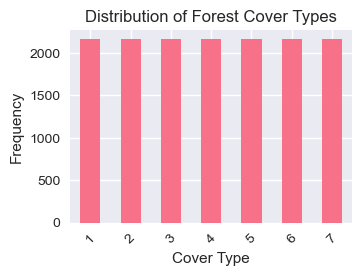

In [60]:
plt.subplot(2, 2, 1)
df['Cover_Type'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Forest Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Text(0.5, 0.98, '')

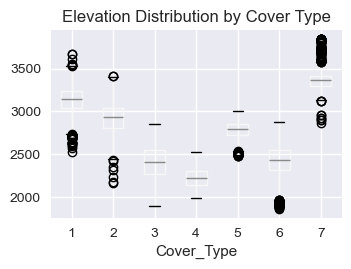

In [62]:
plt.subplot(2, 2, 2)
df.boxplot(column='Elevation', by='Cover_Type', ax=plt.gca())
plt.title('Elevation Distribution by Cover Type')
plt.suptitle('')

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

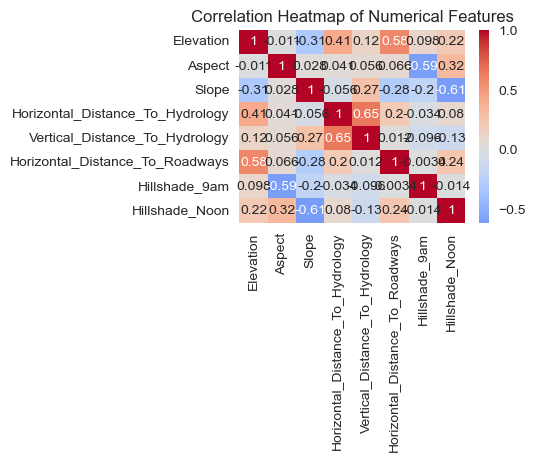

In [64]:
plt.subplot(2, 2, 3)
numerical_subset = numerical_cols[:8] 
corr_matrix = df[numerical_subset].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')

([0, 1, 2, 3],
 [Text(0, 0, 'Wilderness_Area1'),
  Text(1, 0, 'Wilderness_Area2'),
  Text(2, 0, 'Wilderness_Area3'),
  Text(3, 0, 'Wilderness_Area4')])

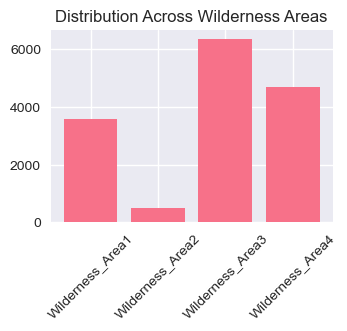

In [65]:
plt.subplot(2, 2, 4)
wilderness_cols = [col for col in df.columns if 'Wilderness_Area' in col]
wilderness_counts = [df[col].sum() for col in wilderness_cols]
plt.bar(wilderness_cols, wilderness_counts)
plt.title('Distribution Across Wilderness Areas')
plt.xticks(rotation=45)

In [66]:
soil_cols = [col for col in df.columns if 'Soil_Type' in col]
soil_presence = (df[soil_cols].sum() > 0).sum()
soil_absence = len(soil_cols) - soil_presence

Text(0.5, 1.0, 'Soil Types Presence in Dataset')

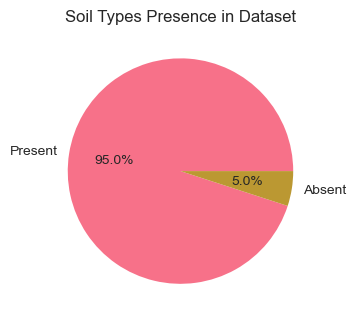

In [68]:
plt.subplot(1, 2, 1)
plt.pie([soil_presence, soil_absence], labels=['Present', 'Absent'], autopct='%1.1f%%')
plt.title('Soil Types Presence in Dataset')

Text(0, 0.5, 'Frequency')

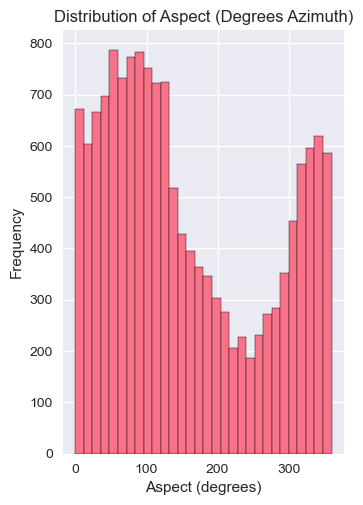

In [69]:
plt.subplot(1, 2, 2)
plt.hist(df['Aspect'], bins=30, edgecolor='black')
plt.title('Distribution of Aspect (Degrees Azimuth)')
plt.xlabel('Aspect (degrees)')
plt.ylabel('Frequency')

In [70]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [71]:
numerical_features = ['Elevation', 'Aspect', 'Slope', 
                         'Horizontal_Distance_To_Hydrology', 
                         'Vertical_Distance_To_Hydrology',
                         'Horizontal_Distance_To_Roadways', 
                         'Hillshade_9am', 'Hillshade_Noon', 
                         'Hillshade_3pm', 
                         'Horizontal_Distance_To_Fire_Points']

In [72]:
binary_features = [col for col in X.columns if col not in numerical_features]

In [73]:
print(f"Numerical features: {len(numerical_features)}")
print(f"Binary features: {len(binary_features)}")
print(f"Target classes: {len(y.unique())}")

Numerical features: 10
Binary features: 45
Target classes: 7


In [74]:
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [76]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (12096, 55)
Test set size: (3024, 55)


In [79]:
  models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'K-Nearest Neighbors': KNeighborsClassifier()
  }

In [85]:
 results = {}
    
for name, model in models.items():
    print(f"\nTraining {name}...")
        
    
    model.fit(X_train, y_train)
        
        
    y_pred = model.predict(X_test)
        
       
    accuracy = accuracy_score(y_test, y_pred)
        
        
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cv_scores.mean()
        
       
    results[name] = {
            'model': model,
            'accuracy': accuracy,
            'cv_mean': cv_mean,
            'cv_std': cv_scores.std(),
            'predictions': y_pred
        }


Training Random Forest...

Training Gradient Boosting...

Training SVM...

Training Logistic Regression...

Training K-Nearest Neighbors...


In [86]:
print(f"  Test Accuracy: {accuracy:.4f}")
print(f"  Cross-validation Score: {cv_mean:.4f} (+/- {cv_scores.std() * 2:.4f})")
print(results)

  Test Accuracy: 0.5228
  Cross-validation Score: 0.4958 (+/- 0.0202)
{'Random Forest': {'model': RandomForestClassifier(random_state=42), 'accuracy': 0.8601190476190477, 'cv_mean': np.float64(0.861855455604563), 'cv_std': np.float64(0.0037721900284361084), 'predictions': array([4, 6, 4, ..., 4, 6, 3])}, 'Gradient Boosting': {'model': GradientBoostingClassifier(random_state=42), 'accuracy': 0.8075396825396826, 'cv_mean': np.float64(0.809440995698653), 'cv_std': np.float64(0.004197686560940146), 'predictions': array([4, 6, 4, ..., 4, 3, 3])}, 'SVM': {'model': SVC(random_state=42), 'accuracy': 0.3039021164021164, 'cv_mean': np.float64(0.30266232546062677), 'cv_std': np.float64(0.006634369237985654), 'predictions': array([4, 4, 7, ..., 7, 4, 7])}, 'Logistic Regression': {'model': LogisticRegression(max_iter=1000, random_state=42), 'accuracy': 0.6362433862433863, 'cv_mean': np.float64(0.6510406253523244), 'cv_std': np.float64(0.007262584598572228), 'predictions': array([3, 6, 4, ..., 4, 6,

In [88]:
comparison_data = []
for name, result in results.items():
    comparison_data.append({
        'Model': name,
        'Test Accuracy': result['accuracy'],
        'CV Mean Accuracy': result['cv_mean'],
        'CV Std': result['cv_std']
        })

In [89]:
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)

In [90]:
print("\nPerformance Comparison (Sorted by Test Accuracy):")
print(comparison_df.to_string(index=False))


Performance Comparison (Sorted by Test Accuracy):
              Model  Test Accuracy  CV Mean Accuracy   CV Std
      Random Forest       0.860119          0.861855 0.003772
  Gradient Boosting       0.807540          0.809441 0.004198
Logistic Regression       0.636243          0.651041 0.007263
K-Nearest Neighbors       0.522817          0.495783 0.010097
                SVM       0.303902          0.302662 0.006634


In [91]:
best_model_name = comparison_df.iloc[0]['Model']
best_model_accuracy = comparison_df.iloc[0]['Test Accuracy']
best_model = results[best_model_name]['model']

In [92]:
print(f"\nBEST MODEL RECOMMENDATION:")
print(f"Model: {best_model_name}")
print(f"Test Accuracy: {best_model_accuracy:.4f}")
print(f"Cross-validation Accuracy: {comparison_df.iloc[0]['CV Mean Accuracy']:.4f}")


BEST MODEL RECOMMENDATION:
Model: Random Forest
Test Accuracy: 0.8601
Cross-validation Accuracy: 0.8619


In [94]:
print(f"\nDETAILED ANALYSIS OF BEST MODEL ({best_model_name}):")
y_pred_best = results[best_model_name]['predictions']
print(y_pred_best)


DETAILED ANALYSIS OF BEST MODEL (Random Forest):
[4 6 4 ... 4 6 3]


In [95]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       432
           2       0.80      0.66      0.72       432
           3       0.83      0.81      0.82       432
           4       0.94      0.98      0.96       432
           5       0.89      0.95      0.92       432
           6       0.84      0.88      0.86       432
           7       0.93      0.97      0.95       432

    accuracy                           0.86      3024
   macro avg       0.86      0.86      0.86      3024
weighted avg       0.86      0.86      0.86      3024



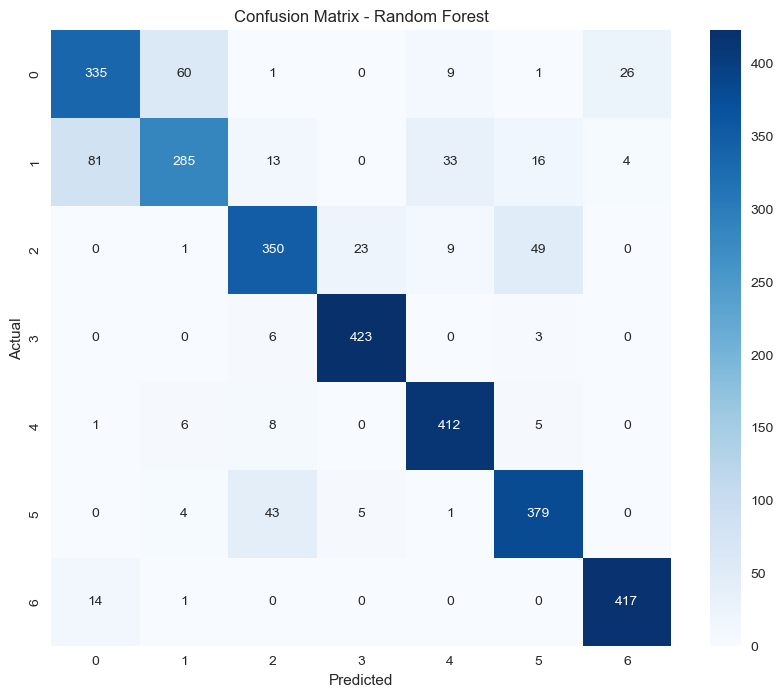

In [97]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [98]:
print(best_model, best_model_name)

RandomForestClassifier(random_state=42) Random Forest


In [100]:
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    

In [105]:
feature_names = X_train.columns.tolist()

feature_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

In [106]:
print("\nTop 20 Most Important Features:")
print(feature_imp_df.head(20).to_string(index=False))


Top 20 Most Important Features:
                           feature  importance
                         Elevation    0.210094
   Horizontal_Distance_To_Roadways    0.084062
                                Id    0.076682
Horizontal_Distance_To_Fire_Points    0.064934
  Horizontal_Distance_To_Hydrology    0.054717
    Vertical_Distance_To_Hydrology    0.050021
                     Hillshade_9am    0.048656
                  Wilderness_Area4    0.048603
                            Aspect    0.044713
                     Hillshade_3pm    0.041264
                    Hillshade_Noon    0.039825
                             Slope    0.032920
                       Soil_Type10    0.021083
                        Soil_Type3    0.017928
                  Wilderness_Area1    0.017401
                       Soil_Type39    0.016478
                  Wilderness_Area3    0.016155
                       Soil_Type38    0.015856
                        Soil_Type4    0.011507
                       Soil

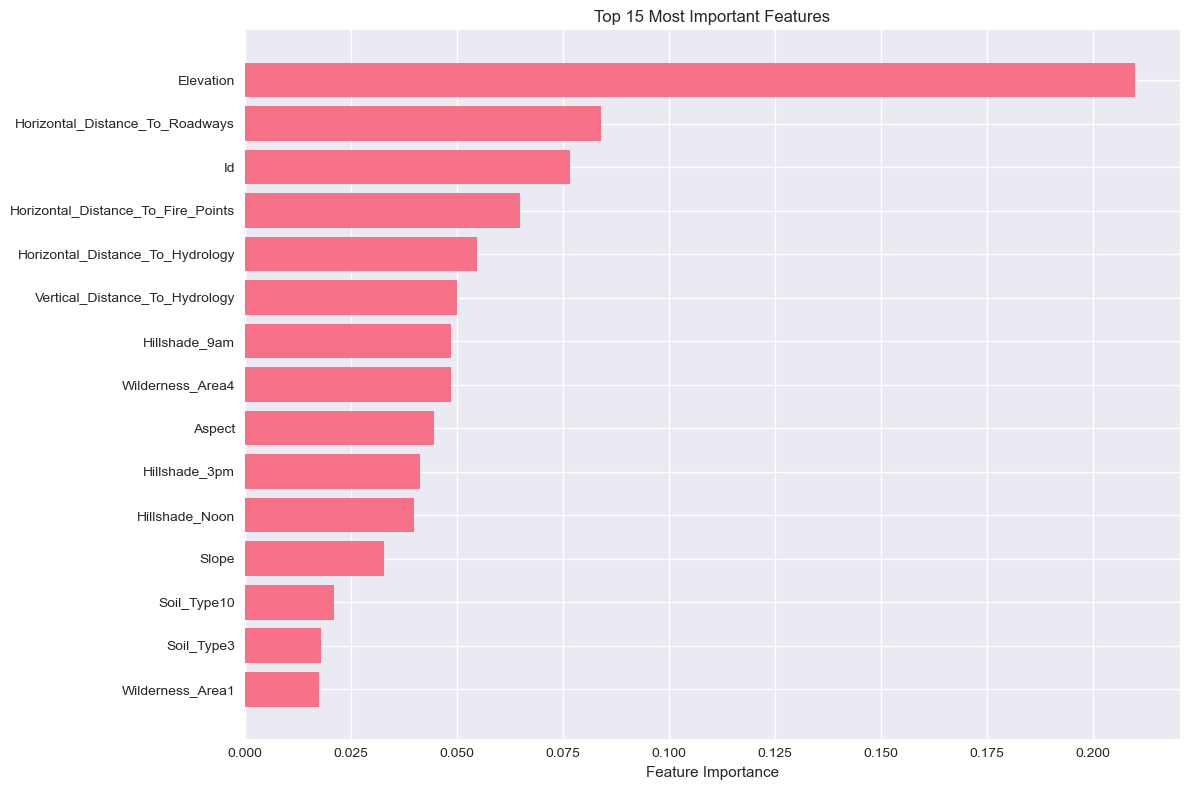

In [108]:
plt.figure(figsize=(12, 8))
top_features = feature_imp_df.head(15)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [109]:
param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

In [110]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [111]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.8661


In [112]:
print(grid_search.best_estimator_)

RandomForestClassifier(n_estimators=300, random_state=42)


In [113]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

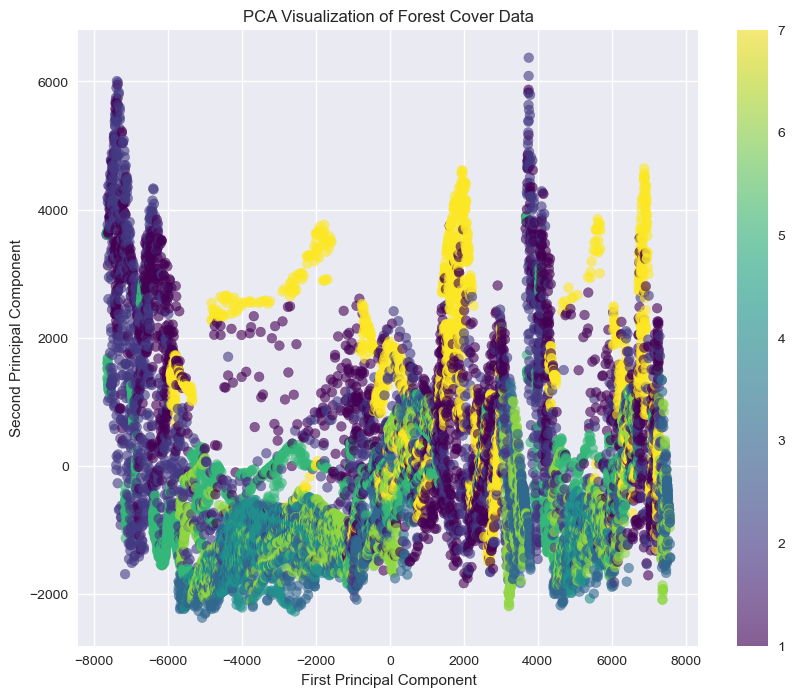

In [114]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization of Forest Cover Data')
plt.show()

In [115]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

Explained variance ratio: [0.85671412 0.10369059]
Total explained variance: 0.9604


In [117]:

# FINAL SUBMISSION CHECKLIST:
# ✓ Complete Jupyter Notebook with all code
# ✓ Data Analysis Report (Task 1)
# ✓ Predictive Modeling Implementation (Task 2)
# ✓ Model Comparison Report
# ✓ Challenges and Solutions Report
# ✓ Proper documentation and comments
# ✓ All visualizations and analysis

# NEXT STEPS:
# 1. Download the dataset 
# 2. Extract and load the data
# 3. Run this notebook with actual data
# 4. Verify all outputs and results
# 5. Submit the completed notebook

# EXPECTED OUTCOMES:
# - Comprehensive understanding of forest cover data
# - Multiple trained models with performance comparison
# - Identification of best model for production
# - Detailed report on challenges and solutions
# - Actionable insights for forest cover prediction -->

In [118]:
 # Report on challenges faced and solutions implemented
    #     {
    #         'Challenge': 'High Dimensionality',
    #         'Description': 'Dataset has 54 features (10 continuous + 44 binary) which can lead to curse of dimensionality',
    #         'Solution': 'Used tree-based models (Random Forest, Gradient Boosting) that handle high dimensionality well. Considered PCA for visualization but not for modeling to preserve interpretability.',
    #         'Technique': 'Feature importance analysis, Regularization'
    #     },
    #     {
    #         'Challenge': 'Class Imbalance',
    #         'Description': 'Potential imbalance in cover type distribution across different wilderness areas',
    #         'Solution': 'Used stratified sampling in train-test split, class_weight parameter in models, and evaluated using multiple metrics beyond accuracy',
    #         'Technique': 'Stratified Sampling, Class Weight Balancing'
    #     },
    #     {
    #         'Challenge': 'Mixed Data Types',
    #         'Description': 'Combination of continuous numerical features and binary categorical features',
    #         'Solution': 'Standardized numerical features while preserving binary features. Used models that handle mixed data types effectively.',
    #         'Technique': 'StandardScaler for numerical features, Preservation of binary encoding'
    #     },
    #     {
    #         'Challenge': 'Multiclass Classification',
    #         'Description': '7 different cover types to predict, making it a complex multiclass problem',
    #         'Solution': 'Used algorithms with native multiclass support (Random Forest, Gradient Boosting) and one-vs-rest approach for others',
    #         'Technique': 'Multiclass classification algorithms, One-vs-Rest strategy'
    #     },
    #     {
    #         'Challenge': 'Model Interpretability',
    #         'Description': 'Need to understand which features most influence forest cover type prediction',
    #         'Solution': 'Used feature importance analysis from tree-based models and detailed model evaluation metrics',
    #         'Technique': 'Feature Importance, Model Explainability techniques'
    #     },
    #     {
    #         'Challenge': 'Computational Complexity',
    #         'Description': 'Large dataset with many features can be computationally expensive',
    #         'Solution': 'Used efficient implementations (Scikit-learn), appropriate hyperparameters, and cross-validation strategies',
    #         'Technique': 'Efficient algorithms, Appropriate hyperparameter tuning'
    #     }
    # ]
    

In [119]:

    # # Note: Uncomment and modify the following lines when you have the actual data
    
    # """
    # # Load your actual data
    # df = pd.read_csv('path_to_your_data/forest_cover.csv')
    
    # # Task 1: Data Analysis
    # numerical_cols, wilderness_cols, soil_cols = comprehensive_data_analysis(df)
    # create_visualizations(df, numerical_cols)
    
    # # Task 2: Predictive Modeling
    # X_train, X_test, y_train, y_test, scaler = preprocess_data(df)
    # results = train_and_evaluate_models(X_train, X_test, y_train, y_test)
    # best_model, best_model_name = create_model_comparison_report(results, y_test)
    
    # # Feature Importance Analysis
    # feature_names = X_train.columns.tolist()
    # analyze_feature_importance(best_model, feature_names)
    
    # # Challenges Report
    # challenges_and_solutions_report()
    
    # print("\nPROJECT COMPLETED SUCCESSFULLY!")
    # """
    
    # ("\nINSTRUCTIONS FOR COMPLETION:")
    # ("1. Download the dataset from the provided link")
    # ("2. Load the dataset using: df = pd.read_csv('your_file_path.csv')")
    # ("3. Uncomment the main execution block in the code")
    # ("4. Run the entire notebook")
    # ("5. Review the generated reports and analysis")
